In [1]:
import sys
import os
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
%matplotlib inline

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../../data')


print(train_df.head())


                                               image                   id  \
0  ../../data/Train/CameraRGB/episode_0002_000287...  episode_0002_000287   
1  ../../data/Train/CameraRGB/episode_0008_000112...  episode_0008_000112   
2                 ../../data/Train/CameraRGB/804.png                  804   
3  ../../data/Train/CameraRGB/episode_0008_000286...  episode_0008_000286   
4  ../../data/Train/CameraRGB/episode_0003_000261...  episode_0003_000261   

                                               label  
0  ../../data/Train/CameraSeg/episode_0002_000287...  
1  ../../data/Train/CameraSeg/episode_0008_000112...  
2                 ../../data/Train/CameraSeg/804.png  
3  ../../data/Train/CameraSeg/episode_0008_000286...  
4  ../../data/Train/CameraSeg/episode_0003_000261...  


In [10]:
from models.segnet import model_segnetVGG16

model = model_segnetVGG16(3, image_shape=(320, 416, 3))
model.reset_states()
model.load_weights('../../saved_models/segnet/segnet_v1//model.hdf5')
model.save('../../saved_models/segnet/segnet_v1//model_saved.h5')
# model.summary()

In [6]:
from gen.datagen import oversample_generator_from_df, balanced_generator_from_df

BATCH_SIZE = 16
model_dir = '../../saved_models/segnet/segnet_v1/'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

train_gen = oversample_generator_from_df(train_df, BATCH_SIZE, (320, 416))
valid_gen = balanced_generator_from_df(valid_df, BATCH_SIZE, (320, 416))

In [7]:
from train import weighted_categorical_crossentropy


weights = np.array([10, 5, 1])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model, 
                   train_gen, 
                   valid_gen, 
                   training_size=1200, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=500,
                   gpus = 1)

Instructions for updating:
Use the retry module or similar alternatives.
Epoch 1/500
75/75 [==============================] - 120s 2s/step - loss: 0.7239 - acc: 0.7806 - val_loss: 0.5478 - val_acc: 0.8789

Epoch 00001: val_loss improved from inf to 0.54776, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 2/500
75/75 [==============================] - 55s 735ms/step - loss: 0.5248 - acc: 0.8753 - val_loss: 0.4184 - val_acc: 0.9221

Epoch 00002: val_loss improved from 0.54776 to 0.41840, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 3/500
75/75 [==============================] - 56s 741ms/step - loss: 0.4113 - acc: 0.9160 - val_loss: 0.3640 - val_acc: 0.9319

Epoch 00003: val_loss improved from 0.41840 to 0.36397, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 4/500
75/75 [==============================] - 56s 742ms/step - loss: 0.3324 - acc: 0.9413 - val_loss: 0.2951 - val_acc: 0.9644

Epoch 00004: val_loss improved fr

75/75 [==============================] - 56s 743ms/step - loss: 0.0430 - acc: 0.9866 - val_loss: 0.0511 - val_acc: 0.9873

Epoch 00035: val_loss improved from 0.05390 to 0.05111, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 36/500
75/75 [==============================] - 56s 740ms/step - loss: 0.0413 - acc: 0.9872 - val_loss: 0.0503 - val_acc: 0.9880

Epoch 00036: val_loss improved from 0.05111 to 0.05028, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 37/500
75/75 [==============================] - 56s 751ms/step - loss: 0.0410 - acc: 0.9869 - val_loss: 0.0611 - val_acc: 0.9846

Epoch 00037: val_loss did not improve
Epoch 38/500
75/75 [==============================] - 56s 745ms/step - loss: 0.0431 - acc: 0.9864 - val_loss: 0.0494 - val_acc: 0.9883

Epoch 00038: val_loss improved from 0.05028 to 0.04940, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 39/500
75/75 [==============================] - 56s 747ms/step - 

Epoch 78/500
75/75 [==============================] - 56s 751ms/step - loss: 0.0339 - acc: 0.9867 - val_loss: 0.0324 - val_acc: 0.9894

Epoch 00078: val_loss improved from 0.03317 to 0.03236, saving model to ../../saved_models/segnet/segnet_v1//model.hdf5
Epoch 79/500
75/75 [==============================] - 56s 749ms/step - loss: 0.0269 - acc: 0.9882 - val_loss: 0.0326 - val_acc: 0.9896

Epoch 00079: val_loss did not improve
Epoch 80/500
75/75 [==============================] - 56s 742ms/step - loss: 0.0266 - acc: 0.9883 - val_loss: 0.0344 - val_acc: 0.9892

Epoch 00080: val_loss did not improve

Epoch 00080: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
Epoch 81/500
75/75 [==============================] - 56s 750ms/step - loss: 0.0245 - acc: 0.9890 - val_loss: 0.0334 - val_acc: 0.9893

Epoch 00081: val_loss did not improve
Epoch 82/500
75/75 [==============================] - 56s 746ms/step - loss: 0.0318 - acc: 0.9881 - val_loss: 0.0347 - val_acc: 0.9888

Epoch 

75/75 [==============================] - 56s 744ms/step - loss: 0.0196 - acc: 0.9910 - val_loss: 0.0381 - val_acc: 0.9886

Epoch 00123: val_loss did not improve
Epoch 124/500
75/75 [==============================] - 55s 737ms/step - loss: 0.0194 - acc: 0.9908 - val_loss: 0.0368 - val_acc: 0.9890

Epoch 00124: val_loss did not improve
Epoch 125/500
75/75 [==============================] - 56s 743ms/step - loss: 0.0223 - acc: 0.9906 - val_loss: 0.0382 - val_acc: 0.9889

Epoch 00125: val_loss did not improve
Epoch 126/500
75/75 [==============================] - 56s 751ms/step - loss: 0.0175 - acc: 0.9913 - val_loss: 0.0411 - val_acc: 0.9883

Epoch 00126: val_loss did not improve
Epoch 127/500
75/75 [==============================] - 56s 748ms/step - loss: 0.0222 - acc: 0.9907 - val_loss: 0.0375 - val_acc: 0.9893

Epoch 00127: val_loss did not improve
Epoch 128/500
75/75 [==============================] - 56s 745ms/step - loss: 0.0233 - acc: 0.9903 - val_loss: 0.0414 - val_acc: 0.9870

Ep

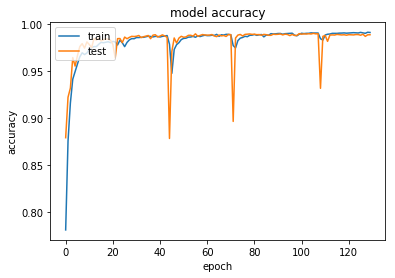

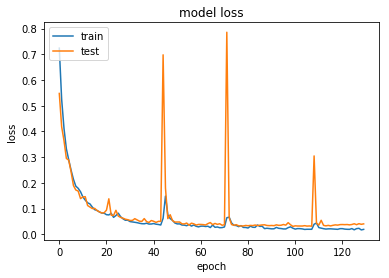

In [9]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('../../saved_models/unet/unet_v3/model.hdf5')
model.save('../../saved_models/unet/unet_v3/model_saved.h5')